In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('gp1_data_1986_to_2015.csv')

In [ ]:
data.head()

,Month,Mkt-RF,SMB,HML,RF,Agric,Food,Soda,Beer,Smoke,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
0,198601,0.65,1.22,0.52,0.56,7.92,2.38,-1.20,-0.86,5.55,...,1.91,5.60,2.48,1.67,-0.09,2.82,6.63,2.08,2.47,3.91
1,198602,7.13,-0.62,-0.85,0.53,13.98,7.89,11.68,7.71,12.20,...,10.61,7.03,8.85,7.21,9.27,11.04,7.41,6.99,8.18,11.28
2,198603,4.88,-0.52,-0.44,0.60,2.74,7.84,10.89,9.17,11.52,...,5.61,3.22,7.41,9.11,6.42,7.22,5.31,9.32,5.49,6.52
3,198604,-1.31,2.85,-2.86,0.52,5.24,-0.57,4.44,-2.92,3.64,...,-0.93,-2.64,1.70,-0.70,3.86,-0.58,-6.10,-3.22,-3.29,-4.69
4,198605,4.62,-1.32,-0.14,0.49,1.08,8.55,7.95,6.37,10.16,...,5.07,0.70,5.52,11.95,4.89,4.20,5.72,-1.21,5.19,6.32


In [ ]:
# Convert month to datetime and set as index
from datetime import datetime
mkt_excess = data.copy()
mkt_excess = mkt_excess[['Month','Mkt-RF']]
mkt_excess['Month'] = pd.to_datetime(mkt_excess['Month'],format='%Y%m')

In [ ]:
# Set Month as index and plot market excess return
mkt_excess = mkt_excess.set_index('Month')

### 2-1 Calculate the excess return of the 48 industry portfolios. 

In [ ]:
# Compute excess return for each of the 48 stocks
assets = list(data.columns[5:])
excess_rt = data[['Month']].copy()
for asset in assets:
    excess_rt[asset] = (data[asset] - data['RF'])
excess_rt['Month'] = pd.to_datetime(excess_rt['Month'],format='%Y%m')
excess_rt=excess_rt.set_index(['Month'])

In [ ]:
excess_rt.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Month,,,,,,,,,,,,,,,,,,,,,
1986-01-01,7.36,1.82,-1.76,-1.42,4.99,1.58,3.35,-1.34,-1.52,4.66,...,1.35,5.04,1.92,1.11,-0.65,2.26,6.07,1.52,1.91,3.35
1986-02-01,13.45,7.36,11.15,7.18,11.67,10.19,7.75,14.14,10.20,8.80,...,10.08,6.50,8.32,6.68,8.74,10.51,6.88,6.46,7.65,10.75
1986-03-01,2.14,7.24,10.29,8.57,10.92,5.05,6.26,4.47,4.97,5.57,...,5.01,2.62,6.81,8.51,5.82,6.62,4.71,8.72,4.89,5.92
1986-04-01,4.72,-1.09,3.92,-3.44,3.12,3.39,7.84,-1.66,-2.18,-3.30,...,-1.45,-3.16,1.18,-1.22,3.34,-1.10,-6.62,-3.74,-3.81,-5.21
1986-05-01,0.59,8.06,7.46,5.88,9.67,2.67,5.42,10.47,4.12,9.29,...,4.58,0.21,5.03,11.46,4.40,3.71,5.23,-1.70,4.70,5.83


### 2-2 Portfolio construction

In [ ]:
# Compute weight vector for equally weighted portfolio
w_EWP = np.ones(48)/48
w_EWP

array([0.02083333, 0.02083333, 0.02083333, 0.02083333, 0.02083333,
       0.02083333, 0.02083333, 0.02083333, 0.02083333, 0.02083333,
       0.02083333, 0.02083333, 0.02083333, 0.02083333, 0.02083333,
       0.02083333, 0.02083333, 0.02083333, 0.02083333, 0.02083333,
       0.02083333, 0.02083333, 0.02083333, 0.02083333, 0.02083333,
       0.02083333, 0.02083333, 0.02083333, 0.02083333, 0.02083333,
       0.02083333, 0.02083333, 0.02083333, 0.02083333, 0.02083333,
       0.02083333, 0.02083333, 0.02083333, 0.02083333, 0.02083333,
       0.02083333, 0.02083333, 0.02083333, 0.02083333, 0.02083333,
       0.02083333, 0.02083333, 0.02083333])

In [ ]:
# Compute weight vector for tangency portfolio
df_cov = (excess_rt[assets]).cov()
V_cov = df_cov.values
df_mu = (excess_rt[assets]).mean()
V_mu = df_mu
# weight for tangency portfolio
w_TAN = np.linalg.inv(V_cov) @ (V_mu)
w_TAN /= np.sum(w_TAN)
w_TAN

array([-0.09435441,  0.1530272 ,  0.08662343,  0.1104785 ,  0.2995244 ,
       -0.38133487,  0.18638871, -0.18630205, -0.31210067,  0.11605872,
       -0.00342404,  0.47532814,  0.33062431, -0.13150861,  0.43435952,
        0.17164913, -0.0262847 , -0.02106621, -0.37409459, -0.05767593,
       -0.07967925,  0.25821426,  0.07855709, -0.0811106 , -0.04940718,
        0.38047381, -0.05453656,  0.36913954, -0.1225659 ,  0.34867112,
        0.42150699, -0.38450713, -0.46762073,  0.553589  , -0.43643119,
        0.40769319, -0.00819824,  0.21278509, -0.06161164,  0.34724601,
       -0.63145548,  0.08938611,  0.02751928, -0.0846205 , -0.20425472,
       -0.32846163,  0.307658  , -0.5838947 ])

In [ ]:
# weight for GMV portfolio
w_GMV = np.linalg.inv(V_cov) @ np.ones((48,1))
w_GMV /= np.sum(w_GMV)
w_GMV.reshape(48)

array([ 0.07111003,  0.09457994, -0.00801643,  0.00550252, -0.03883012,
       -0.04575143, -0.02797509,  0.04433541,  0.22697491, -0.04033657,
       -0.02949257,  0.07423983,  0.00444643, -0.15673505, -0.06460357,
       -0.03619626, -0.06297209, -0.13817986, -0.07137401,  0.06785085,
       -0.01704981, -0.12036106, -0.04121485, -0.12470509, -0.04117267,
        0.12137193,  0.05469262,  0.0218453 , -0.0036532 ,  0.12987745,
        0.37864979,  0.10252557, -0.03843821, -0.05319288,  0.09090145,
        0.03262493,  0.00490531,  0.1146428 ,  0.07612637,  0.22584111,
        0.05221575,  0.1651965 ,  0.05852539, -0.0390151 , -0.03687624,
        0.0761373 , -0.01767139, -0.04130592])

### 2-3,4 Calculate the realized (in-sample) expected returns, standard deviations, Sharpe ratios, and betas of every 48 industry portfolio, as well as the market portfolio (MKT), EWP, TAN, and GMV.

In [ ]:
# Based on the weight computed in previous step, add columns for different portfolio
excess_rt['EWP'] = excess_rt[assets].dot(w_EWP)
excess_rt['TAN'] = excess_rt[assets].dot(w_TAN)
excess_rt['GMV'] = excess_rt[assets].dot(w_GMV)
# Add column for Mkt-rf as well
excess_rt['Mkt'] = mkt_excess['Mkt-RF']

In [ ]:
# Summary table
# expected return
summary = pd.DataFrame(columns=excess_rt.columns)
summary.loc['mean'] = excess_rt.mean()
# standard deviation
summary.loc['std_dev'] = excess_rt.std()
# Sharpe Ratio
summary.loc['sharpe'] = summary.loc['mean']/summary.loc['std_dev']
# Beta
test = assets + ['Mkt','EWP','TAN','GMV']
summary.loc['beta'] = excess_rt[test].cov()['Mkt']/(excess_rt['Mkt'].std()**2)

In [ ]:
summary

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Meals,Banks,Insur,RlEst,Fin,Other,EWP,TAN,GMV,Mkt
mean,0.700861,0.836806,0.899500,0.991889,1.254278,0.531028,0.940722,0.480139,0.667972,0.822778,...,0.789917,0.683444,0.704111,0.191333,0.841583,0.284889,0.699881,2.456390,0.555440,0.636361
std_dev,6.400108,4.452608,7.002115,5.107061,6.847884,6.706478,7.596395,5.725771,4.499215,6.574475,...,5.077974,6.159674,5.394359,7.561326,6.750720,6.644728,4.695839,5.958956,2.833610,4.484527
sharpe,0.109508,0.187936,0.128461,0.194219,0.183163,0.079181,0.123838,0.083856,0.148464,0.125147,...,0.155557,0.110955,0.130527,0.025304,0.124666,0.042874,0.149043,0.412218,0.196018,0.141902
beta,0.781294,0.599901,0.825378,0.639299,0.632916,1.044329,1.344289,1.030524,0.716603,1.082334,...,0.838383,1.072768,0.926363,1.093516,1.324347,1.108609,0.995986,0.511414,0.387089,1.000000


### 2-5-(a) The (ex-post) σ vs. E[r] diagram.

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import math 
import copy

In [ ]:
w_GT=np.vstack((w_GMV.transpose(),w_TAN.T))

Text(0, 0.5, 'E[r] in %')

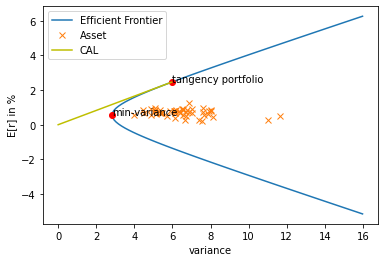

In [ ]:
x=[]
y=[]
# mean=mu.copy()
# allows 25 times shorting
for k in np.linspace(-3,3,100):
    d=w_GT.transpose()@np.array([[1-k], [k]])
    Ep=V_mu@d
    x.append(Ep[0])
    varp = d.transpose()@V_cov@d
    stdp=np.sqrt(varp[0,0])
    y.append(stdp)
    

plt.plot(y, x,label='Efficient Frontier');
plt.plot(2.833609681,0.5554398,'ro')
plt.annotate('min-variance',(2.833609681, 0.5554398))
plt.plot(5.958955769, 2.456389897,'ro')
plt.annotate('tangency portfolio',(5.958955769, 2.456389897))

# Add points for the 48 assets
plt.plot(summary.iloc[1,:48], summary.iloc[0,:48],'x',label='Asset')
# CAL line
rf_p = [0.0, 0.0]
tan_p = [5.958955769, 2.456389897]
x_values = [rf_p[0], tan_p[0]]
# gather x-values
y_values = [rf_p[1], tan_p[1]]
# gather y-values
plt.plot(x_values, y_values, 'y',label='CAL')
plt.legend(loc='best')

plt.xlabel("variance")
plt.ylabel("E[r] in %")

Text(0, 0.5, 'E[r] in %')

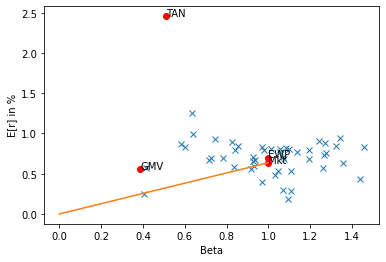

In [ ]:
# Plot beta vs E[r] diagram
plt.plot(summary.iloc[3,:48], summary.iloc[0,:48],'x',label='Asset')
# Add remaining portfolio and markets
plt.plot(summary.iloc[3,48:], summary.iloc[0,48:],'ro',label='Asset')
for i in [48,49,50,51]:
    plt.annotate(summary.columns[i],(summary.iloc[3,i], summary.iloc[0,i]))

# SML line
A = [0, 0.0]
B = [1, 0.636361]
x_values = [A[0], B[0]]
y_values = [A[1], B[1]]
plt.plot(x_values, y_values)

plt.xlabel("Beta")
plt.ylabel("E[r] in %")